#  Анализ поведения пользователей стартапа по продажам продуктов питания

**Цель** – исследование результатов A/A/B тестов для принятия решения – влияет ли изменение шрифтов в приложении стартапа по продаже продуктов питания на воронку продаж.

**Задачи**:

* изучить воронку продаж: узнать сколько пользователей доходя до покупки;
* исследовать A/A группы для получения уверенности в точности проведенного тестирования;
* исследовать результаты A/B тестов;
* выявить, есть ли изменение в поведении пользователей в разных группах, и является ли оно статистически значимым.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Первичное-изучение-данных-и-их-предобработка" data-toc-modified-id="Первичное-изучение-данных-и-их-предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Первичное изучение данных и их предобработка</a></span></li><li><span><a href="#Детальное-изучение-и-проверка-данных" data-toc-modified-id="Детальное-изучение-и-проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Детальное изучение и проверка данных</a></span><ul class="toc-item"><li><span><a href="#Расчёт-количества-событий-в-логе" data-toc-modified-id="Расчёт-количества-событий-в-логе-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчёт количества событий в логе</a></span></li><li><span><a href="#Расчёт-пользователей-в-логе" data-toc-modified-id="Расчёт-пользователей-в-логе-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчёт пользователей в логе</a></span></li><li><span><a href="#Расчёт-среднего-числа-событий-на-пользователя" data-toc-modified-id="Расчёт-среднего-числа-событий-на-пользователя-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчёт среднего числа событий на пользователя</a></span></li><li><span><a href="#Исследование-временного-промежутка-полученных-данных" data-toc-modified-id="Исследование-временного-промежутка-полученных-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Исследование временного промежутка полученных данных</a></span></li></ul></li><li><span><a href="#Изучение-воронки-событий" data-toc-modified-id="Изучение-воронки-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение воронки событий</a></span><ul class="toc-item"><li><span><a href="#Определение-частоты-каждого-события" data-toc-modified-id="Определение-частоты-каждого-события-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Определение частоты каждого события</a></span></li><li><span><a href="#Расчёт-уникальных-пользователей-на-каждое-событие" data-toc-modified-id="Расчёт-уникальных-пользователей-на-каждое-событие-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчёт уникальных пользователей на каждое событие</a></span></li><li><span><a href="#Расчёт-доли-пользователей,-переходящих-на-следующий-шаг-воронки" data-toc-modified-id="Расчёт-доли-пользователей,-переходящих-на-следующий-шаг-воронки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Расчёт доли пользователей, переходящих на следующий шаг воронки</a></span></li></ul></li><li><span><a href="#Изучение-результатов-эксперимента" data-toc-modified-id="Изучение-результатов-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Изучение результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Проверка-контрольных-групп" data-toc-modified-id="Проверка-контрольных-групп-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка контрольных групп</a></span></li><li><span><a href="#Сравнение-групп-A-с-группой-B" data-toc-modified-id="Сравнение-групп-A-с-группой-B-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Сравнение групп A с группой B</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Описание проекта

Действия или события пользователей стартапа представлены в датасете `logs`:

* `EventName` — название события;
* `DeviceIDHash` — уникальный идентификатор пользователя;
* `EventTimestamp` — время события;
* `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats as st

## Первичное изучение данных и их предобработка

In [2]:
try:
    logs = pd.read_csv(r"C:\Users\baran\data analysis\datasets\logs_exp.csv", sep='\t')
except:
    logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


В предлагаемом для анализа датасете с логами пользователей всего 4 столбца:

* `EventName` — название события;
* `DeviceIDHash` — уникальный идентификатор пользователя;
* `EventTimestamp` — время события;
* `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

In [3]:
# изучим данные
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Нулей в столбцах нет, однако

* Изменим название столбцов на более удобное;
* Изменим тип данных в столбце со временем событий 
* Добавим отдельно столбец с датой события

In [4]:
# заменяем названия столбцов 
logs.columns = ['event_name', 'user_id', 'event_datetime', 'group']

# изменяем тип данных в event_time
logs['event_datetime'] = pd.to_datetime(logs['event_datetime'], unit='s')

# добавляем столбец с датой события 
logs['event_date'] = logs['event_datetime'].dt.date

logs.head()

,event_name,user_id,event_datetime,group,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


* Убедимся, что один пользователь не принадлежит сразу нескольким группам

In [5]:
# создаем таблицу с пользователями и их группами
duplicates_or_no = logs.groupby('user_id')['group'].unique()

# заносим пользователей у которых более 1 группы в список и выводим его длину
users_with_duplicates = []
for user, group in duplicates_or_no.items():
    if len(group) > 1:
        users_with_duplicates.append(user)
print(users_with_duplicates)    
print(len(users_with_duplicates))    

[]
0


Все пользователи принадлежат разным группам.

* Проверим дубликаты

In [6]:
# проверка на наличие явных дубликатов по всем столбцам
print(logs.duplicated().sum())

413


Обнаружилось 413 явных дубликатов. Посмотрим на них

In [7]:
duplicates = logs.loc[logs.duplicated()]
duplicates.head(10)

,event_name,user_id,event_datetime,group,event_date
453,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248,2019-07-30
2350,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248,2019-07-31
3573,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248,2019-08-01
4076,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247,2019-08-01
4803,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248,2019-08-01
5641,CartScreenAppear,4248762472840564256,2019-08-01 05:36:04,248,2019-08-01
5875,PaymentScreenSuccessful,6427012997733591237,2019-08-01 05:47:32,248,2019-08-01
7249,OffersScreenAppear,7224691986599895551,2019-08-01 06:44:06,246,2019-08-01
8065,CartScreenAppear,8189122927585332969,2019-08-01 07:18:49,248,2019-08-01
9179,MainScreenAppear,2230705996155527339,2019-08-01 07:54:47,246,2019-08-01


In [8]:
# посмотрим, когда это было
duplicates.groupby('event_date')['user_id'].count()

event_date
2019-07-30     1
2019-07-31     1
2019-08-01    88
2019-08-02    52
2019-08-03    69
2019-08-04    65
2019-08-05    55
2019-08-06    34
2019-08-07    48
Name: user_id, dtype: int64

Причину выяснить не удаётся, необходимо сообщить датаинженерам о наличии дубликатов в датасете. Возможно, их косяк.

В свою очередь, мы их удаляем.

In [9]:
logs = logs.drop_duplicates()

**Вывод:** в результате первичной предобработки данных:

* изменены названия столбцов;
* заменён тип данных у столбца, содержащего дату и время; 
* добавлен отдельный столбец с датой;
* устранены 413 дубликатов.

## Детальное изучение и проверка данных

### Расчёт количества событий в логе

In [10]:
print(logs['event_name'].unique())

['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


В логе всего 5 событий.

* `MainScreenAppear` – появление главное экрана
* `PaymentScreenSuccessful` – появление экрана успешной оплаты
* `CartScreenAppear` – появление экрана корзины
* `OffersScreenAppear` – появление экрана предложений 
* `Tutorial` – обучение

### Расчёт пользователей в логе

In [11]:
logs['user_id'].nunique()

7551

Всего в логе 7551 уникальных пользователей. Посмотрим теперь, как они распределены по группам

In [12]:
logs.groupby('group')['user_id'].nunique()

group
246    2489
247    2520
248    2542
Name: user_id, dtype: int64

In [13]:
logs_shape = logs.shape[0]
logs_shape

243713

Таким образом, 7551 пользователей совершили 243713 события. Небольшое преимущество по пользователям у группы 248.

### Расчёт среднего числа событий на пользователя

In [14]:
# группируем по user_id и считаем события
logs.groupby('user_id')['event_name'].count().head(5)

user_id
6888746892508752      1
6909561520679493      5
6922444491712477     47
7435777799948366      6
7702139951469979    137
Name: event_name, dtype: int64

Даже из первых 5 пользователей видно, что разброс огромный – лучше считать медиану.

In [15]:
logs.groupby('user_id')['event_name'].count().median()

20.0

Таким образом, в среднем на пользователя приходится 20 событий.  Посмотрим на гистограмму

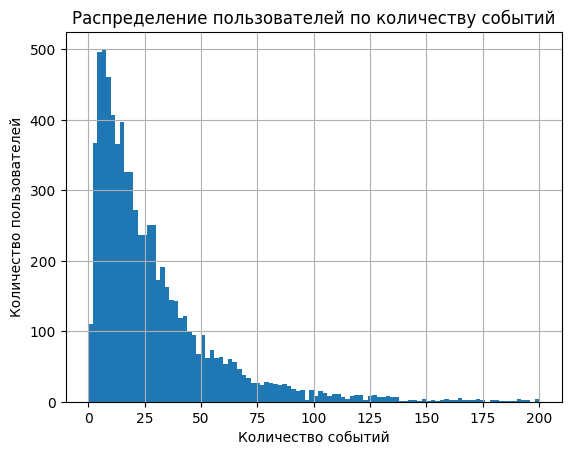

In [16]:
logs.groupby('user_id')['event_name'].count().hist(bins = 100,  range=(0, 200))
plt.title('Распределение пользователей по количеству событий')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей');

### Исследование временного промежутка полученных данных

**Определим самое раннее и самое позднее события**

In [17]:
# определяем самое раннее событие
logs['event_date'].min()

datetime.date(2019, 7, 25)

In [18]:
# определяем самое позднее событие
logs['event_date'].max()

datetime.date(2019, 8, 7)

In [19]:
# смотрим на разницу
logs['event_date'].max() - logs['event_date'].min()

datetime.timedelta(days=13)

В предоставленном для анализе датасете минимальная дата – 2019-07-25, максимальная – 2019-08-07. Всего 13 дней.

**Визуализируем динамику событий по группам**

In [20]:
# построим таблицу
dynamic_events = logs.groupby(['event_date', 'group'])['event_name'].count().reset_index()
dynamic_events.head()

,event_date,group,event_name
0,2019-07-25,246,4
1,2019-07-25,247,1
2,2019-07-25,248,4
3,2019-07-26,246,14
4,2019-07-26,247,8


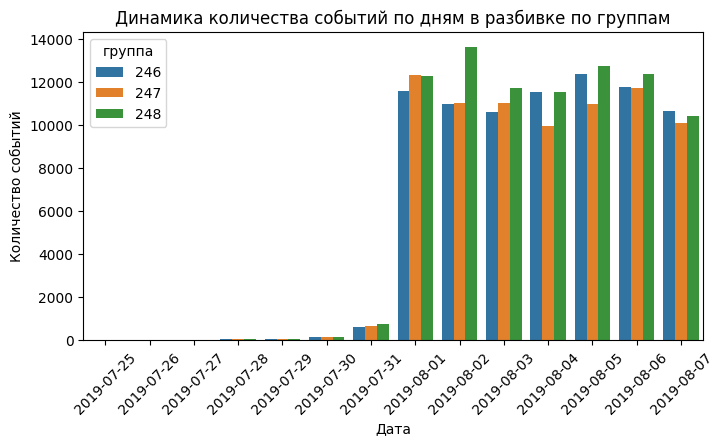

In [21]:
# визуализируем результаты
plt.figure(figsize=(8, 4))
sns.barplot(x='event_date', y='event_name', hue='group', data=dynamic_events)
plt.title('Динамика количества событий по дням в разбивке по группам')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.legend(title='группа');

Из представленной динамики можно сделать вывод, что пользователи активно совершали события в период с 1 по 7 августа. Кроме того, в большинстве случаев в исследуемой выборке наиболее активными являются пользователи 248 группы. Таким образом, данные до 1 августа будем считать неполными. Они могут исказить дальнейшее исследование.

In [22]:
# cмотрим сколько таких событий
logs.query('event_datetime < "2019-08-01 00:00:00"').shape[0] / logs_shape * 100

1.159560630741897

Событий раньше 1 августа менее 1,2% от всех событий. Удаляем их.

In [23]:
# делаем срез
logs_active = logs.query('event_datetime >= "2019-08-01 00:00:00"')

# смотрим сколько событий осталось
print(logs_active.shape[0])

# смотрим сколько уникальных пользователей осталось
print(logs_active['user_id'].nunique())

240887
7534


Таким образом, откинули 2826 событий и 17 пользователей

## Изучение воронки событий

### Определение частоты каждого события

In [24]:
# выведем сводную таблицу
print(logs_active.groupby('event_name')['event_name'].count().sort_values())

event_name
Tutorial                     1005
PaymentScreenSuccessful     33918
CartScreenAppear            42303
OffersScreenAppear          46333
MainScreenAppear           117328
Name: event_name, dtype: int64


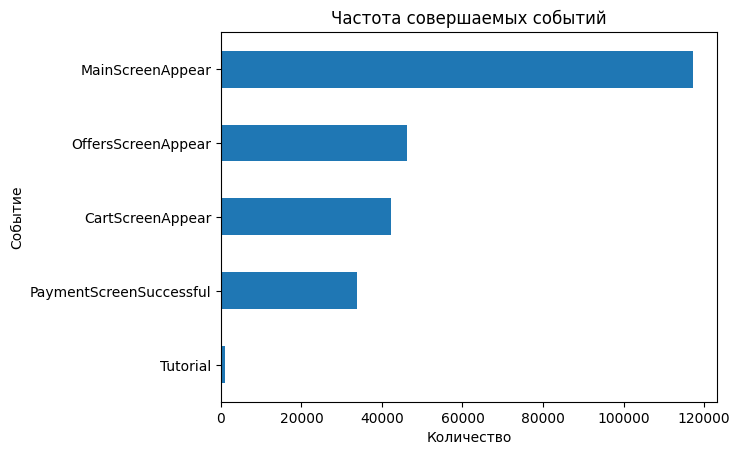

In [25]:
# визуализируем 
logs_active.groupby('event_name')['event_name'].count().sort_values().plot(kind='barh')
plt.title('Частота совершаемых событий')
plt.ylabel('Событие')
plt.xlabel('Количество');

Больше всего было совершено событий – `MainScreenAppear`, меньше всего – `Tutorial`.

### Расчёт уникальных пользователей на каждое событие

In [26]:
logs_active.groupby('event_name')['user_id'].nunique().sort_values()

event_name
Tutorial                    840
PaymentScreenSuccessful    3539
CartScreenAppear           3734
OffersScreenAppear         4593
MainScreenAppear           7419
Name: user_id, dtype: int64

Таким образом, из 7534 пользователей 7419 совершали событие `MainScreenAppear`, 4593 – `OffersScreenAppear`, 3734 – `CartScreenAppear`, 3539 – `PaymentScreenSuccessful` и 840 – `Tutorial`.

Посчитаем их долю от всех пользователей в процентах и визуализируем

In [27]:
(logs_active.groupby('event_name')['user_id']
 .nunique().sort_values() / logs_active['user_id'].nunique() * 100).round()

event_name
Tutorial                   11.0
PaymentScreenSuccessful    47.0
CartScreenAppear           50.0
OffersScreenAppear         61.0
MainScreenAppear           98.0
Name: user_id, dtype: float64

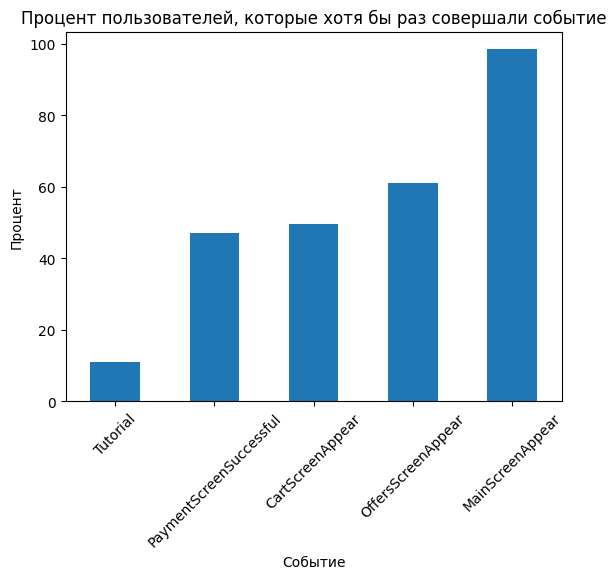

In [28]:
(logs_active.groupby('event_name')['user_id'].nunique().sort_values() / 7534 * 100).plot(kind='bar')
plt.title('Процент пользователей, которые хотя бы раз совершали событие')
plt.ylabel('Процент')
plt.xlabel('Событие')
plt.xticks(rotation=45);

Таким образом, из 7534 пользователей 98% попадают (или переходят) на основной экран, 61% – переходят на экран предложения, 50% – переходят в корзину, 47% – совершают покупку и 11% – переходят на экран с обучением.

Переход на обучение может происходить на любом из этапов жизни пользователя на сайте. Такое событие выбивается из последовательной цепочки. Посмотрим какой процент составляют такие события

In [29]:
logs_active.query('event_name == "Tutorial"').shape[0] / logs_active.shape[0] * 100

0.4172080685134524

Таких событий менее 1 процента. Удаляем их

In [30]:
logs_active = logs_active.query('event_name != "Tutorial"')

### Расчёт доли пользователей, переходящих на следующий шаг воронки

* Посчитаем уникальных пользователей, которые делали переход 

1. MainScreenAppear - OffersScreenAppear, 
2. OffersScreenAppear - CartScreenAppear
3. CartScreenAppear - PaymentScreenSuccessful


In [31]:
# запомним user_id пользователей, которые переходили на основной экран
MainScreenAppear_user_id = list(logs_active.query('event_name == "MainScreenAppear"')['user_id'].unique())

# смотрим кто из них дошел до экрана с предложениями
OffersScreenAppear_user_id = (list(logs_active
        .query('event_name == "OffersScreenAppear" and user_id in @MainScreenAppear_user_id')['user_id'].unique()))

# выводим их количество
print(f'{len(MainScreenAppear_user_id)} пользователей перешло на главный экран')
print(f'{len(OffersScreenAppear_user_id)} из них перешли на экран с предложениями')

7419 пользователей перешло на главный экран
4482 из них перешли на экран с предложениями


In [32]:
# считаем долю
round(len(OffersScreenAppear_user_id) / len(MainScreenAppear_user_id), 2) * 100

60.0

Таким образом, 60% из главного экрана перешли в экран на экран с предложениями

In [33]:
# определяем, кто из экрана с предложениями перешёл в корзину
CartScreenAppear_user_id = (list(logs_active
         .query('event_name == "CartScreenAppear" and user_id in @OffersScreenAppear_user_id')['user_id'].unique()))
print(f'{len(CartScreenAppear_user_id)} пользователей перешли в корзину')

3580 пользователей перешли в корзину


In [34]:
# считаем долю
round(len(CartScreenAppear_user_id) / len(OffersScreenAppear_user_id), 2) * 100

80.0

80% пользователей из экрана с предложением перешли в корзину

In [35]:
# определяем, кто из корзины перешёл к оплате
PaymentScreenSuccessful_user_id = (list(logs_active
    .query('event_name == "PaymentScreenSuccessful" and user_id in @CartScreenAppear_user_id')['user_id'].unique()))
print(f'{len(PaymentScreenSuccessful_user_id)} пользователей оплатили заказ')

3429 пользователей оплатили заказ


In [36]:
# считаем долю
round(len(PaymentScreenSuccessful_user_id) / len(CartScreenAppear_user_id), 2) * 100

96.0

96% пользователей, переходивших в корзину, оплатили заказ

In [37]:
# доля от первого события до оплаты
round(len(PaymentScreenSuccessful_user_id) / len(MainScreenAppear_user_id), 2) * 100

46.0

Таким образом:

* Из 7419 пользователей, перешедших на главный экран, 4482 перешли на экран с предложениями (60%)
* Из 4482 пользователей, перешедших на экран с предложениями, 3580 перешли в корзину (80%)
* Из 3580 пользователей, перешедших в корзину, 3429 оплатили заказ (96%)

Большинство пользователей теряются на шаге перехода к экрану с предложениями.

От первого события до оплаты проходят 46% пользователей.

## Изучение результатов эксперимента

### Проверка контрольных групп 

Посмотрим сколько теперь пользователей в каждой группе после всех предобработок

In [38]:
logs_active.groupby('group')['user_id'].nunique()

group
246    2483
247    2512
248    2535
Name: user_id, dtype: int64

В группе 246 (А1) – 2483 пользователя, в группе 247 (A2) – 2512 и вгруппе 248 (B) – 2535.

Посмотрим, на сколько процентов отличается количество пользователей в группах. Сравним для этого наибольшее и наименьшее числа

In [39]:
round((1 - 2483/2535)*100)

2

In [40]:
 round((1 - len(logs_active.query('group == 246')['user_id'].unique()) /
 len(logs_active.query('group == 248')['user_id'].unique())) * 100)

2

Таким образом, относительная разница пользователей в группах не превышает 2%.

Проверим, находят ли статистическую значимость статистические критерии между выборками 246 и 247. Для этого проверим гипотезы о равенстве двух долей (Z-критерий).

Будем сравнивавать следующие доли: m / n, где m – количество пользователей в группе, совершивших определенное событие, n – количество пользователей в группе.

Z-критерий определяется следующей формулой:

$$Z \approx \frac{P_1-P_2}{\sqrt{P(1-P)(1/n_{1} + 1/n_{2})}},$$

где $n_1$ и $n_2$ – размеры двух сравниваемых выборок (в нашем случае количество пользователей), $P_1$ и $P_2$ – пропорции, наблюдаемые в выборках, $P$ – пропорция в выборке, скомбинированной из двух наблюдаемых.

Создадим отдельную функцию и вызовим её 4 раза (т. к. 4 события).

In [41]:
# в последний параметр будем подавать группу, если рассматриваем объединённую контрольную группу
def z_criteria(data, group_1, group_2, event, alpha, group_3):
    
    # задаём размеры групп
    n1 = data.query('group == @group_1')['user_id'].nunique()
    
    if group_3 == 0:
        n2 = data.query('group == @group_2')['user_id'].nunique()
    else:
        n2 = data.query('group == @group_2 or group == @group_3')['user_id'].nunique()
    
    # задаём количество пользователей по группам, совершивших событие event
    m1 = data.query('group == @group_1 and event_name == @event')['user_id'].nunique()
    
    if group_3 == 0:
        m2 = data.query('group == @group_2 and event_name == @event')['user_id'].nunique()
    else:
        m2 = data.query('(group == @group_2 or group == @group_3) and event_name == @event')['user_id'].nunique()
    
    # считаем пропорции
    P1 = m1 / n1
    P2 = m2 / n2
    P = (m1 + m2) / (n1 + n2)
    
    # считаем z-value
    z_value = (P1 - P2) / np.sqrt((P * (1-P) * (1/n1 + 1/n2)))
    
    # задаём нормальное распределение
    distr = st.norm(0, 1)
    
    # считаем p-value
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print(f'Событие: {event}')
    print(f'p-value: {p_value}')
    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

Сформулируем гипотезы:

**H0**: для события X между группами **нет** статистически значимых различий

**H1**: для события X между группами **есть** статистически значимые различия

где X – одно из четырёх событий ('MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful')

Проверяем!

In [42]:
for event_name in logs_active['event_name'].unique():
    z_criteria(logs_active, 246, 247, event_name, 0.05, 0)
    print()

Событие: MainScreenAppear
p-value: 0.7526703436483038
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p-value: 0.24786096925282264
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p-value: 0.22867643757335676
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p-value: 0.11446627829276612
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Таким образом, будем считать, что статистически значимых различий между контрольными группами 246 и 247 нет. Разбиение на группы работает корректно.

### Сравнение групп A с группой B

In [43]:
# сравнение групп 246 (A1) и 248 (B)
for event_name in logs_active['event_name'].unique():
    z_criteria(logs_active, 246, 248, event_name, 0.05, 0)
    print()

Событие: MainScreenAppear
p-value: 0.3387114076159288
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p-value: 0.21442476639710506
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p-value: 0.08067367598823139
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p-value: 0.21693033984516674
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Между группами 246 и 248 статистически значимых различий нет.

In [44]:
# сравнение групп 247 (A2) и 248 (B)
for event_name in logs_active['event_name'].unique():
    z_criteria(logs_active, 247, 248, event_name, 0.05, 0)
    print()

Событие: MainScreenAppear
p-value: 0.5194964354051703
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p-value: 0.9333751305879443
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p-value: 0.5878284605111943
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p-value: 0.7275718682261119
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Между группами 247 и 248 статистически значимых различий нет.

In [45]:
# cравнений объединённой группы (246 (A1) и 247 (A2)) и 248 (B)
for event_name in logs_active['event_name'].unique():
    z_criteria(logs_active, 248, 246, event_name, 0.05, 247)
    print()

Событие: MainScreenAppear
p-value: 0.3486684291093256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
p-value: 0.44582745409482394
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
p-value: 0.18683558686831558
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
p-value: 0.6107918742187335
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Между объединёнными группами 246 с 247 и группой 248 статистически значимых различий нет.

**Вывод**: Изучение комбинаций всех групп по каждому событию позволяет заключить, что статистически значимых различий между группами нет. Следовательно, изменение шрифта не приводит к существенному изменению пользователей.

**Замечание**: Ответим на вопрос: почему не скорректировали уровень значимости (ведь происходит множественная проверка гипотез), и что будет, если скорректировать?

**Ответ**: В данном случае, при $\alpha = 0.05$ мы получили везде принятие нулевой гипотезы (p-value больше уровня значимости). Сделав коррекцию уровня значимости (например, методом Бонферрони), мы только уменьшим этот уровень значимости для каждого теста. Следовательно, p-value будет ещё гораздо больше, чем уровень значимости. Поэтому в данном случае ничего не изменится.


По скольку было проведено n = 16 тестов, то, согласно поправке Бонферрони, необходимо задать уровень значимости

$$\alpha_{\text{corr}}= \frac{\alpha}{n} = \frac{0.05}{16} = 0.003125$$

## Вывод 

1) На этапе первичной предобработки данных были выявлены 413 дубликатов, которые были устранены из дальнейшего исследования.

2) В рассматриваемом датасете наблюдалось всего 5 событий:
* переход пользователя на главный экран
* переход пользователя на экран предложений;
* переход в корзину;
* оплата;
* обучение.

На все 5 событий приходилось 7551 уникальных пользователя, которые совершили 243713 события и состояли в одной из трёх групп – 246, 247 и 248. Небольшое преимущество по пользователям наблюдалось у 248 группы. Временной промежуток событий: с 2019-07-25 по 2019-08-07.

3) Исследование динамики количества событий по дням показало, что до 2019-08-01 событий было крайне мало. Такие данные были приняты как неполные и удалены из исследования. 

4) Наиболее часто совершаемое событие – посещение главного экрана сайта. На него попадают (или переходят) 98% пользователей, 61% – переходят на экран с предложениями, 50% проходят в корзину, 47% совершают покупку и только 11% переходят на экран с обучением. Переход на обучение может происходить на любом из этапов жизни пользователя на сайте. Такое событие выбивается из последовательной цепочки. Поэтому такие события были исключены из рассмотрения.

5) Расчёт доли пользователей, переходящих на следующий шаг воронки показал: 
* Из 7419 пользователей, перешедших на главный экран, 4482 перешли на экран с предложениями (60%);
* Из 4482 пользователей, перешедших на экран с предложениями, 3580 перешли в корзину (80%);
* Из 3580 пользователей, перешедших в корзину, 3429 оплатили заказ (96%).

Большинство пользователей теряются на шаге перехода к экрану с предложениями. От первого события до оплаты проходят 46% пользователей.

6) Перед проведением анализа A/B теста были проанализированы A группы. Было показано, что относительная разница пользователей в группах не превышает 2%. Чтобы понять, является ли эта разница статистически значимой, был проведён статистический тест (определён z-value). Сравнивая доли пользователей по событиям из разных групп, было выяснено, что статистически значимых отличий между группам 246 и 247 нет. Таким образом, разбиение на группы работает корректно.

7) Изучение комбинаций всех групп (246 и 248, 247 и 248, 246+247 и 248) попарно по каждому событию показало, что статистически значимых различий между этими группами также не наблюдается. 

Следовательно, **изменение шрифта на сайте не приводит к статистически значимому изменению пользователей**. 

В рамках проведения статистических тестов уровень значимости задавался равным 5%. Следовательно, в 5% случаев можно ошибочно отклонить нулевую гипотезу, при условии, что она верна. Увеличив уровень статистической значимости до 10%, некоторые нулевые гипотезы оказались бы отвергнутыми, что означало бы о появлении разницы между группами. Например, событие "переход в корзину" в тесте сравнения групп 246 и 248 позволило бы заключить, что группы различаются. 